# Schematics for paper
author: Elizabeth A. Barnes, Randal J. Barnes


In [1]:
import sys
import os
import glob
import time
import pickle

import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras import optimizers 
from tensorflow.keras import regularizers
import tensorflow_probability as tfp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import palettable

# from icecream import ic
import pprint

mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi']= 150
dpiFig = 300.

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
tf.print(f"sys.version = {sys.version}", output_stream=sys.stdout)
tf.print(f"tf.version.VERSION = {tf.version.VERSION}", output_stream=sys.stdout)

sys.version = 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]
tf.version.VERSION = 2.7.0


In [2]:
### for white background...
plt.rc('text',usetex=False)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Avant Garde']}) 
plt.rc('savefig',facecolor='white')
plt.rc('axes',facecolor='white')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('xtick',color='dimgrey')
plt.rc('ytick',color='dimgrey')
################################  
################################  
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')  
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([]) 

## ShAsh

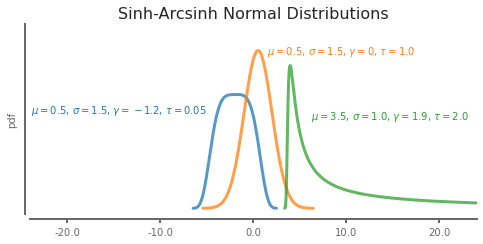

In [7]:
fig = plt.figure(figsize=(3.5*2,3.5))
#----------------------------------------------------------------
ax = plt.subplot(111)

adjust_spines(ax, ['left','bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')

x_plot = np.arange(-10,25,.01)
#-------------------------
mu_pred = .5
sigma_pred = 1.5
skew_pred = -1.2
tail_pred = .05
dists = tfp.distributions.SinhArcsinh(loc=mu_pred,scale=sigma_pred,skewness=skew_pred,tailweight=tail_pred)
y_plot = dists.prob(x_plot).numpy()
i = np.where(y_plot>.0001)[0]
plt.plot(x_plot[i],y_plot[i],'-',linewidth=3,alpha=.75)

plt.text(-5,.16,
         '$\mu=' + str(mu_pred) + '$, ' +
         '$\sigma=' + str(sigma_pred) + '$, ' +
         '$\gamma=' + str(skew_pred) + '$, ' +
         '$\\tau=' + str(tail_pred) + '$',
         fontsize=10,
         horizontalalignment='right',
         color='tab:blue')
#-------------------------
mu_pred = .5
sigma_pred = 1.5
skew_pred = 0
tail_pred = 1.0
dists = tfp.distributions.SinhArcsinh(loc=mu_pred,scale=sigma_pred,skewness=skew_pred,tailweight=tail_pred)
y_plot = dists.prob(x_plot).numpy()
i = np.where(y_plot>.0001)[0]
plt.plot(x_plot[i],y_plot[i],'-',linewidth=3,alpha=.75)

plt.text(1.5,.26,
         '$\mu=' + str(mu_pred) + '$, ' +
         '$\sigma=' + str(sigma_pred) + '$, ' +
         '$\gamma=' + str(skew_pred) + '$, ' +
         '$\\tau=' + str(tail_pred) + '$',
         fontsize=10,
         color='tab:orange')


#-------------------------
mu_pred = 3.5
sigma_pred = 1.0
skew_pred = 1.9
tail_pred = 2.
dists = tfp.distributions.SinhArcsinh(loc=mu_pred,scale=sigma_pred,skewness=skew_pred,tailweight=tail_pred)
y_plot = dists.prob(x_plot).numpy()
i = np.where(y_plot>.0001)[0]
plt.plot(x_plot[i],y_plot[i],'-',linewidth=3,alpha=.75)

plt.text(6.2,.15,
         '$\mu=' + str(mu_pred) + '$, ' +
         '$\sigma=' + str(sigma_pred) + '$, ' +
         '$\gamma=' + str(skew_pred) + '$, ' +
         '$\\tau=' + str(tail_pred) + '$',
         fontsize=10,
         color='tab:green')

array_of_labels = np.around(np.arange(0,2.,.1),3)
plt.yticks(array_of_labels,map(str,array_of_labels))
array_of_labels = np.around(np.arange(-30,30.,10),3)
plt.xticks(array_of_labels,map(str,array_of_labels))

# plt.xticks([])
plt.yticks([])
plt.ylabel('pdf')
plt.grid(False)

plt.ylim(-.01,.31)
plt.xlim(-24,24)

plt.title('Sinh-Arcsinh Normal Distributions',fontsize=16)

plt.tight_layout()
plt.savefig('figures/sinhArcsinh_curves' + '.png', dpi=dpiFig)


plt.show()

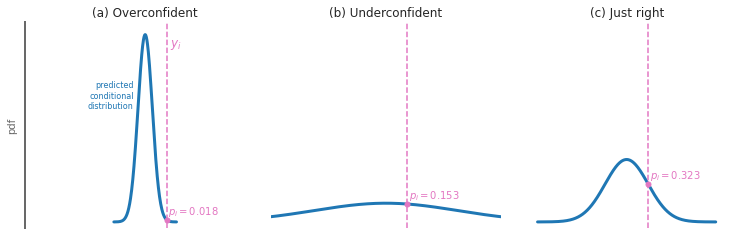

In [10]:
import scipy.stats as stats
#----------------------------------------------------------------
fig = plt.figure(figsize=(3.5*3,3.5))
#----------------------------------------------------------------
ax = plt.subplot(131)
adjust_spines(ax, ['left','bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('dimgrey')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')

norm_mu = 0
norm_sigma = .25
x = np.arange(-5,5,.01)

rv = stats.norm(norm_mu,norm_sigma)
i = np.where(np.abs(rv.pdf(x))>.0001)[0]
plt.plot(x[i],rv.pdf(x[i]),linewidth=3)
plt.text(-.4,
         rv.pdf(.25),
         'predicted\nconditional\ndistribution',
#          'predicted\n$\mathcal{N}(\mu_i,\sigma_i)$',
         color='tab:blue',
         fontsize=8,
         horizontalalignment='right')

y_dot = .75
plt.axvline(x=y_dot,linewidth=1.5,linestyle='--',color='tab:pink')
plt.text(y_dot+.1,1.5,'$y_i$',color='tab:pink',fontsize=12)

plt.plot(y_dot,rv.pdf(y_dot),'.',markersize=10,color='tab:pink')
plt.text(y_dot+.05,
         rv.pdf(y_dot)+.05,
         '$p_i='+str(np.round(rv.pdf(y_dot),3)) + '$',
         fontsize=10,
         color='tab:pink')

array_of_ylabels = np.around(np.arange(0,2.,.2),3)
plt.yticks(array_of_ylabels,map(str,array_of_ylabels))

plt.xlim(-4,4)
plt.ylim(-.05,1.7)
plt.xticks([])
plt.title('(a) Overconfident', fontsize=12)
plt.yticks([])
plt.ylabel('pdf')
plt.grid(False)


#----------------------------------------------------------------
ax = plt.subplot(132)
adjust_spines(ax, ['bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')

norm_mu = 0
norm_sigma = 2.5
x = np.arange(-5,5,.01)

rv = stats.norm(norm_mu,norm_sigma)
i = np.where(np.abs(rv.pdf(x))>.0001)[0]
plt.plot(x[i],rv.pdf(x[i]),linewidth=3)
# plt.text(-.325,
#          rv.pdf(.25)+.05,
#          'predicted\n$\mathcal{N}(\mu_i,\sigma_i)$',
#          color='tab:blue',
#          fontsize=8,
#          horizontalalignment='right')

y_dot = .75
plt.axvline(x=y_dot,linewidth=1.5,linestyle='--',color='tab:pink')
# plt.text(y_dot+.1,1.5,'$y_i$',color='tab:pink',fontsize=12)

plt.plot(y_dot,rv.pdf(y_dot),'.',markersize=10,color='tab:pink')
plt.text(y_dot+.05,
         rv.pdf(y_dot)+.05,
         '$p_i='+str(np.round(rv.pdf(y_dot),3)) + '$',
         fontsize=10,
         color='tab:pink')

plt.xlim(-4,4)
plt.ylim(-.05,1.7)
plt.xticks([])
plt.title('(b) Underconfident', fontsize=12)

#----------------------------------------------------------------
ax = plt.subplot(133)
adjust_spines(ax, ['bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')

norm_mu = 0
norm_sigma = .75
x = np.arange(-5,5,.01)

rv = stats.norm(norm_mu,norm_sigma)
i = np.where(np.abs(rv.pdf(x))>.0001)[0]
plt.plot(x[i],rv.pdf(x[i]),linewidth=3)
# plt.text(-.5,
#          rv.pdf(.25),
#          'predicted\n$\mathcal{N}(\mu_i,\sigma_i)$',
#          color='tab:blue',
#          fontsize=8,
#          horizontalalignment='right')

y_dot = .75
plt.axvline(x=y_dot,linewidth=1.5,linestyle='--',color='tab:pink')
# plt.text(y_dot+.1,1.5,'$y_i$',color='tab:pink',fontsize=12)

plt.plot(y_dot,rv.pdf(y_dot),'.',markersize=10,color='tab:pink')
plt.text(y_dot+.05,
         rv.pdf(y_dot)+.05,
         '$p_i='+str(np.round(rv.pdf(y_dot),3)) + '$',
         fontsize=10,
         color='tab:pink')

plt.xlim(-4,4)
plt.ylim(-.05,1.7)
plt.xticks([])
plt.title('(c) Just right', fontsize=12)


#----------------------------------------------------------------

plt.tight_layout()
plt.savefig('figures/schematic_normal_pdfs' + '.png', dpi=dpiFig)    

plt.show()